# CRÍTICA DE PELÍCULAS

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.DataFrame({'Opinion': np.array([5,4,3,2,1,0]), 'Cantidad de votantes': np.array([40, 99, 145, 133, 96, 40])})

In [26]:
df

,Opinion,Cantidad de votantes
0,5,40
1,4,99
2,3,145
3,2,133
4,1,96
5,0,40


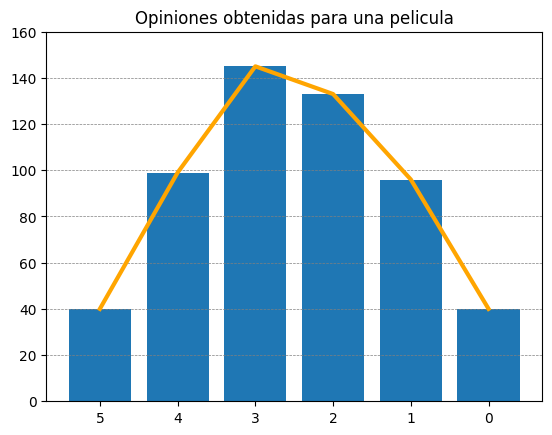

In [27]:
fig, ax = plt.subplots()
ax.grid(axis = 'y', color = 'gray', linestyle = '--', linewidth = 0.5)
ax.bar(df['Opinion'], df['Cantidad de votantes'])
ax.plot(df['Opinion'], df['Cantidad de votantes'], color = 'orange', linewidth = 3)
ax.set_ylim([0, 160])
ax.invert_xaxis() 
ax.set_title('Opiniones obtenidas para una pelicula')
plt.show()

In [28]:
df.columns = ['Opinion (Xi)', 'Cantidad de votantes (ni)']

In [29]:
df2 = df.copy()

# Cáculo de la media

In [30]:
df2['Productos (Xi * ni)'] = df2['Opinion (Xi)'] * df2['Cantidad de votantes (ni)']

In [31]:
df2

,Opinion (Xi),Cantidad de votantes (ni),Productos (Xi * ni)
0,5,40,200
1,4,99,396
2,3,145,435
3,2,133,266
4,1,96,96
5,0,40,0


In [33]:
suma_prod = df2['Productos (Xi * ni)'].sum()

In [34]:
suma_frec = df2['Cantidad de votantes (ni)'].sum()

In [36]:
media = suma_prod / suma_frec
print(media)

2.518987341772152


# Cálculo de la varianza

In [39]:
df3 = df2.copy()

In [42]:
df3['Ni * ((Xi-media)**2)'] = round((df3['Opinion (Xi)'] - media) ** 2 * df3['Cantidad de votantes (ni)'],3)

In [43]:
df3

,Opinion (Xi),Cantidad de votantes (ni),Productos (Xi * ni),Ni * ((Xi-media)**2)
0,5,40,200,246.217
1,4,99,396,217.146
2,3,145,435,33.549
3,2,133,266,35.823
4,1,96,96,221.503
5,0,40,0,253.812


In [48]:
suma_col4 = df3['Ni * ((Xi-media)**2)'].sum()

In [53]:
varianza = suma_col4 / suma_frec
print(round(varianza,3))

1.823


In [56]:
desviacion = np.sqrt(varianza)
print(round(desviacion,3))

1.35


# Cálculo de intervalos de confianza


**68%**

In [57]:
porcentaje_1 = 0.68
lim_inf = int(media - desviacion)
lim_sup = int(media + desviacion)
observaciones = df3[(df3['Opinion (Xi)'] >= lim_inf) & (df3['Opinion (Xi)'] <= lim_sup)]

In [58]:
print('El intervalo de confianza del ', porcentaje_1 * 100, '% es: ', round(lim_inf, 2), ' - ', round(lim_sup, 2))
print('Cantidad de observaciones totales: ', suma_frec)
print('Cantidad de observaciones en el intervalo: ', observaciones['Cantidad de votantes (ni)'].sum())
print('Porcentaje de observaciones en el intervalo: ', round(observaciones['Cantidad de votantes (ni)'].sum()/suma_frec * 100, 2), '%')

El intervalo de confianza del  68.0 % es:  1  -  3
Cantidad de observaciones totales:  553
Cantidad de observaciones en el intervalo:  374
Porcentaje de observaciones en el intervalo:  67.63 %


**95%**

In [59]:
porcentaje_2 = 0.95
lim_inf = max(int(media - 2*desviacion),0)
lim_sup = min(int(media + 2*desviacion), 5)
observaciones = df3[(df3['Opinion (Xi)'] >= lim_inf) & (df3['Opinion (Xi)'] <= lim_sup)]

In [60]:
print('El intervalo de confianza del ', porcentaje_2 * 100, '% es: ', round(lim_inf, 2), ' - ', round(lim_sup, 2))
print('Cantidad de observaciones totales: ', suma_frec)
print('Cantidad de observaciones en el intervalo: ', observaciones['Cantidad de votantes (ni)'].sum())
print('Porcentaje de observaciones en el intervalo: ', round(observaciones['Cantidad de votantes (ni)'].sum()/suma_frec * 100, 2), '%')

El intervalo de confianza del  95.0 % es:  0  -  5
Cantidad de observaciones totales:  553
Cantidad de observaciones en el intervalo:  553
Porcentaje de observaciones en el intervalo:  100.0 %


**97%**

In [61]:
porcentaje_3 = 0.97
lim_inf = max(int(media - 3*desviacion),0)
lim_sup = min(int(media + 3*desviacion), 5)
observaciones = df3[(df3['Opinion (Xi)'] >= lim_inf) & (df3['Opinion (Xi)'] <= lim_sup)]

In [62]:
print('El intervalo de confianza del ', porcentaje_3 * 100, '% es: ', round(lim_inf, 2), ' - ', round(lim_sup, 2))
print('Cantidad de observaciones totales: ', suma_frec)
print('Cantidad de observaciones en el intervalo: ', observaciones['Cantidad de votantes (ni)'].sum())
print('Porcentaje de observaciones en el intervalo: ', round(observaciones['Cantidad de votantes (ni)'].sum()/suma_frec * 100, 2), '%')

El intervalo de confianza del  97.0 % es:  0  -  5
Cantidad de observaciones totales:  553
Cantidad de observaciones en el intervalo:  553
Porcentaje de observaciones en el intervalo:  100.0 %
